In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import dask.dataframe as dd
import dask.dataframe as dd
import os
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns


DATA_DIR = "data/parking-violations"

# data directories
DATA_DIR = 'data/parking-violations/'
WEATHER_DIR = 'data/weather/'
AUGMENTED_DIR = 'data/augmented/'

SCHOOLS_DIR = 'data/schools/'


## 0. Weather 
done seperately with NYCWeatherData.py

## 1. Schools

In [87]:
# SCHOOL PART
# Load school data
schools = pd.read_csv(SCHOOLS_DIR + 'Public_School_Locations.csv')
print(schools.head())
print(schools.columns)

# Number of unique boroughs
unique_boroughs = schools.BORO.unique()
print(f"School boroughs: {unique_boroughs}")

# EDA:  nan data for boroughs, percentage of nan data
#print(schools['BORO'].isna().sum())
#print(len(schools))
print(round(schools['BORO'].isna().sum() / len(schools) * 100, 2), "% of data is Nan")

# Number of schools in each borough
borough_school_counts = schools['BORO'].value_counts().to_dict()
print(borough_school_counts)

# normalize by the total number of schools
total_schools = len(schools)
borough_school_counts = {k: v / total_schools for k, v in borough_school_counts.items()}
print(borough_school_counts)
    
# Save the dictionary to a JSON file
with open(SCHOOLS_DIR + 'borough_school_counts.json', 'w') as file:
    json.dump(borough_school_counts, file)

print("Saved borough school counts to 'borough_school_counts.json'")

       ATS_CODE BORO  BORONUM LOC_CODE              SCHOOLNAME  \
0  15K001          K      2.0     K001     P.S. 001 THE BERGEN   
1  17K002          K      2.0     K002                M.S. 002   
2  21K095          K      2.0     K095  P.S. 095 THE GRAVESEND   
3  21K096          K      2.0     K096       I.S. 096 SETH LOW   
4  21K097          K      2.0     K097    P.S. 97 THE HIGHLAWN   

                          SCH_TYPE  MANAGED_BY  GEO_DISTRI  ADMIN_DIST  \
0                       Elementary           1          15          15   
1  Junior High-Intermediate-Middle           1          17          17   
2                              K-8           1          21          21   
3  Junior High-Intermediate-Middle           1          21          21   
4                       Elementary           1          21          21   

                  ADDRESS STATE_CODE    ZIP               PRINCIPAL  \
0           309 47 STREET         NY  11220        Jennifer Eusanio   
1     655 PARKSI

In [7]:
address = pd.read_csv("data/Address_Point.csv")

In [10]:
import pandas as pd

# EDA for address dataframe
address_info = address.info()
address_summary = address.describe()
address_missing_values = address.isnull().sum()

# Print the information, summary statistics, and missing values
print("Address DataFrame Information:")
print(address_info)
print("\nAddress DataFrame Summary Statistics:")
print(address_summary)
print("\nAddress DataFrame Missing Values:")
print(address_missing_values)

for col in address.columns:
    print(col)
    print(address[col].head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967760 entries, 0 to 967759
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   the_geom    967760 non-null  object 
 1   ADDRESS_ID  967760 non-null  int64  
 2   BIN         967760 non-null  int64  
 3   H_NO        967760 non-null  object 
 4   HNO_SUFFIX  23644 non-null   object 
 5   HYPHEN_TYP  967760 non-null  object 
 6   SIDE_OF_ST  967760 non-null  int64  
 7   SPECIAL_CO  14390 non-null   object 
 8   BOROCODE    967760 non-null  int64  
 9   ZIPCODE     967758 non-null  float64
 10  CREATED     967760 non-null  object 
 11  MODIFIED    284791 non-null  object 
 12  ST_NAME     967683 non-null  object 
 13  HN_RNG      17724 non-null   object 
 14  HN_RNG_SUF  428 non-null     object 
 15  PHYSICALID  967760 non-null  int64  
 16  PRE_MODIFI  145 non-null     object 
 17  PRE_DIRECT  120244 non-null  object 
 18  PRE_TYPE    22079 non-null   object 
 19  PO

In [5]:
for col in schools.columns:
    print(col)
    print(schools[col].unique())

ATS_CODE
['15K001 \xa0\xa0\xa0\xa0\xa0' '17K002 \xa0\xa0\xa0\xa0\xa0'
 '21K095 \xa0\xa0\xa0\xa0\xa0' ... '84X539' '84X553' '84X554']
BORO
['K' 'M' 'X' 'Q' 'R' 'O' nan]
BORONUM
[2. 1. 4. 5. 3. 0.]
LOC_CODE
['K001' 'K002' 'K095' ... 'X539' 'X553' 'X554']
SCHOOLNAME
['P.S. 001 THE BERGEN' 'M.S. 002' 'P.S. 095 THE GRAVESEND' ...
 'The New Visions Charter High School for Advanced Math and Sci'
 'The New Visions Charter High School for the Humanities'
 'New York City Montessori Charter School']
SCH_TYPE
['Elementary' 'Junior High-Intermediate-Middle' 'K-8' 'K-12 all grades'
 'Secondary School' 'Early Childhood' 'High school' 'Ungraded']
MANAGED_BY
[1 2]
GEO_DISTRI
[15 17 21 20 13 32 19 22 14 18 23 16  2  6  4  3  1  5  8 30 26 24 28 29
 25 27 31  7  9 10 12 11  0]
ADMIN_DIST
[15 17 21 20 13 32 19 22 14 18 23 75 16 84 79  2  6  4  3  1  5 30 24 28
 29 26 25 27 31  7  9 10 12  8 11  0 64]
ADDRESS
['309 47 STREET' '655 PARKSIDE AVENUE' '345 VAN SICKLEN STREET' ...
 '36-14 12TH STREET' '1500 PEL

In [11]:
# Parking violations exploration
df = dd.read_parquet(os.path.join(DATA_DIR, '2015.parquet'))

In [12]:
# do the same for parking violations

# EDA for parking violations dataframe
df_info = df.info()
df_summary = df.describe()
df_missing_values = df.isnull().sum()

# Print the information, summary statistics, and missing values
print("Parking Violations DataFrame Information:")
print(df_info)
print("\nParking Violations DataFrame Summary Statistics:")
print(df_summary)
print("\nParking Violations DataFrame Missing Values:")
print(df_missing_values)

for col in df.columns:
    print(col)
    print(df[col].head(10))

<class 'dask_expr.DataFrame'>
Columns: 43 entries, Summons Number to Double Parking Violation
dtypes: int64(13), string(30)Parking Violations DataFrame Information:
None

Parking Violations DataFrame Summary Statistics:
Dask DataFrame Structure:
              Summons Number Violation Code Street Code1 Street Code2 Street Code3 Violation Location Violation Precinct Issuer Precinct Issuer Code Law Section Unregistered Vehicle? Vehicle Year Feet From Curb
npartitions=1                                                                                                                                                                                                     
                     float64        float64      float64      float64      float64            float64            float64         float64     float64     float64               float64      float64        float64
                         ...            ...          ...          ...          ...                ...                ... 

## 2. Events

In [18]:
# extracting events
events = pd.read_csv("data/events/NYC_Parks_Events_Listing___Event_Listing_20240719.csv") 

In [19]:
# EDA for events dataframe
# do the same for parking violations
# EDA for events dataframe
events_info = events.info()
events_summary = events.describe()
events_missing_values = events.isnull().sum()

# Print the information, summary statistics, and missing values
print("Events DataFrame Information:")
print(events_info)
print("\nEvents DataFrame Summary Statistics:")
print(events_summary)
print("\nEvents DataFrame Missing Values:")
print(events_missing_values)

for col in events.columns:
    print(col)
    print(events[col].head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74880 entries, 0 to 74879
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   event_id              74880 non-null  int64 
 1   title                 74880 non-null  object
 2   date                  74880 non-null  object
 3   start_time            74880 non-null  object
 4   end_time              74880 non-null  object
 5   location_description  14520 non-null  object
 6   description           74876 non-null  object
 7   snippet               74570 non-null  object
 8   phone                 57983 non-null  object
 9   email                 51939 non-null  object
 10  cost_free             74880 non-null  int64 
 11  cost_description      15090 non-null  object
 12  must_see              74880 non-null  int64 
 13  url                   74878 non-null  object
 14  notice                74880 non-null  int64 
dtypes: int64(4), object(11)
memory usage

In [20]:
# event locations
event_loc = pd.read_csv("data/events/NYC_Parks_Events_Listing___Event_Locations_20240719.csv")

In [21]:
event_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95796 entries, 0 to 95795
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   event_id    95796 non-null  int64  
 1   name        95794 non-null  object 
 2   park_id     83533 non-null  object 
 3   lat         95796 non-null  float64
 4   long        95796 non-null  float64
 5   address     49735 non-null  object 
 6   zip         57970 non-null  float64
 7   borough     94317 non-null  object 
 8   accessible  53176 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 6.6+ MB


In [22]:
# join both events and event locations on event_id, keep only where both are available
events = events.merge(event_loc, on='event_id', how='inner')

In [23]:
# EDA for events dataframe
# do the same for parking violations
# EDA for events dataframe
events_info = events.info()
events_summary = events.describe()
events_missing_values = events.isnull().sum()

# Print the information, summary statistics, and missing values
print("Events DataFrame Information:")
print(events_info)
print("\nEvents DataFrame Summary Statistics:")
print(events_summary)
print("\nEvents DataFrame Missing Values:")
print(events_missing_values)

for col in events.columns:
    print(col)
    print(events[col].head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76520 entries, 0 to 76519
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   event_id              76520 non-null  int64  
 1   title                 76520 non-null  object 
 2   date                  76520 non-null  object 
 3   start_time            76520 non-null  object 
 4   end_time              76520 non-null  object 
 5   location_description  14676 non-null  object 
 6   description           76516 non-null  object 
 7   snippet               76210 non-null  object 
 8   phone                 58738 non-null  object 
 9   email                 52826 non-null  object 
 10  cost_free             76520 non-null  int64  
 11  cost_description      15144 non-null  object 
 12  must_see              76520 non-null  int64  
 13  url                   76518 non-null  object 
 14  notice                76520 non-null  int64  
 15  name               

In [26]:
# Group by 'date' and 'borough', then count the number of events in each group
events_count = events.groupby(['date', 'borough']).size().reset_index(name='events_count')
print(events_count)

             date borough  events_count
0      01/01/2013       B             1
1      01/01/2013       M             2
2      01/01/2013       X             4
3      01/01/2014       B             1
4      01/01/2014       M             4
...           ...     ...           ...
10460  12/31/2017       Q             1
10461  12/31/2017       R             1
10462  12/31/2017       X             2
10463  12/31/2018       M             2
10464  12/31/2018       R             2

[10465 rows x 3 columns]


In [36]:
# decsending order
events_count.sort_values(by='events_count', ascending=False)

,date,borough,events_count
3958,2016-05-21,M,75
3799,2015-05-16,M,73
7823,2013-09-28,M,70
3825,2014-05-17,M,67
8343,2016-10-15,M,65
...,...,...,...
10382,2018-12-28,B,1
10286,2013-12-25,B,1
114,2015-01-05,R,1
593,2016-01-23,B,1


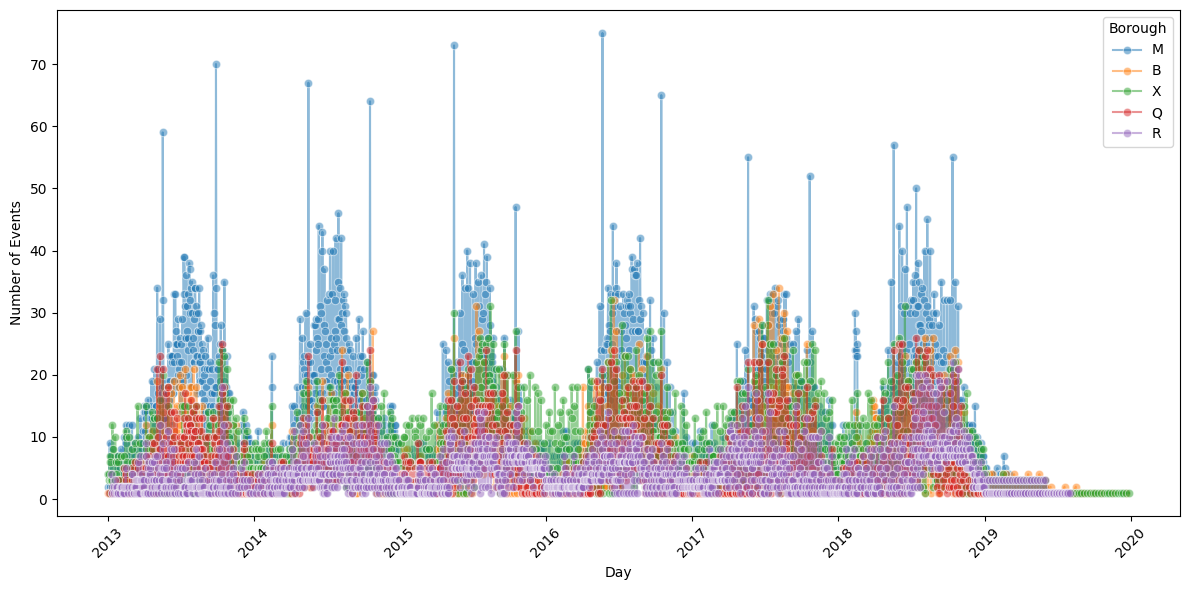

In [69]:
# PLOTTING
events_count['date'] = pd.to_datetime(events_count['date'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=events_count, x='date', y='events_count', hue='borough', marker='o', alpha=0.5)

#plt.title('Distribution of Events by Day and Borough')
plt.xlabel('Day')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.legend(title='Borough')
plt.tight_layout()

plt.savefig('plots/events_distribution_by_borough_and_day.png')
plt.show()

#### Normalizing event data

by borough sums

<Axes: xlabel='borough'>

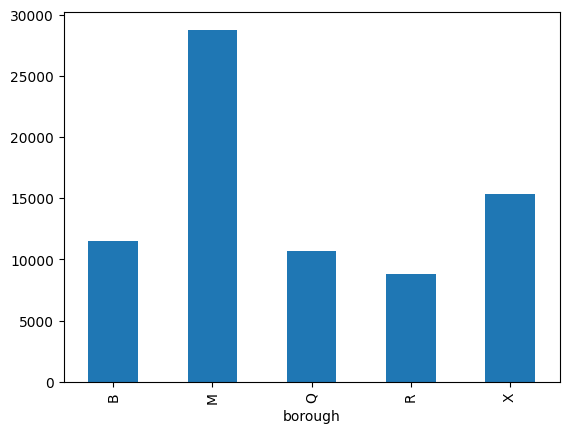

In [43]:
borough_sums = events_count.groupby("borough")["events_count"].sum()
borough_sums.plot(kind="bar") 


In [59]:
# normalize the data with the total number of events in each borough
events_count['total_events_by_borough']=events_count.groupby('borough')['events_count'].transform('sum')
events_count['borough_normalized_events'] = events_count['events_count'] / events_count['total_events_by_borough']


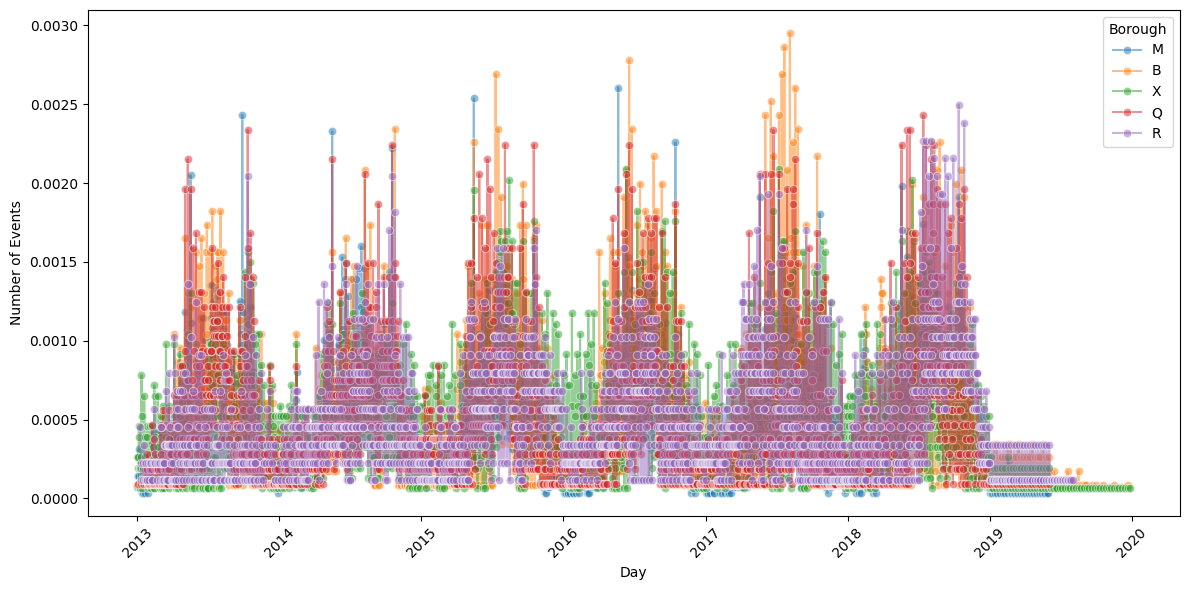

In [70]:
# PLOTTING
events_count['date'] = pd.to_datetime(events_count['date'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=events_count, x='date', y='borough_normalized_events', hue='borough', marker='o', alpha=0.5)

#plt.title('Distribution of Events by Day and Borough')
plt.xlabel('Day')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.legend(title='Borough')
plt.tight_layout()
plt.savefig('plots/events_distribution_by_borough_and_day-normalized-by-borough-sum.png')
plt.show()


by bin (day) sums

In [63]:
# normalize the data with the total number of events for each day
events_count['total_events_by_day']=events_count.groupby('date')['events_count'].transform('sum')
events_count['day_normalized_events'] = events_count['events_count'] / events_count['total_events_by_day']

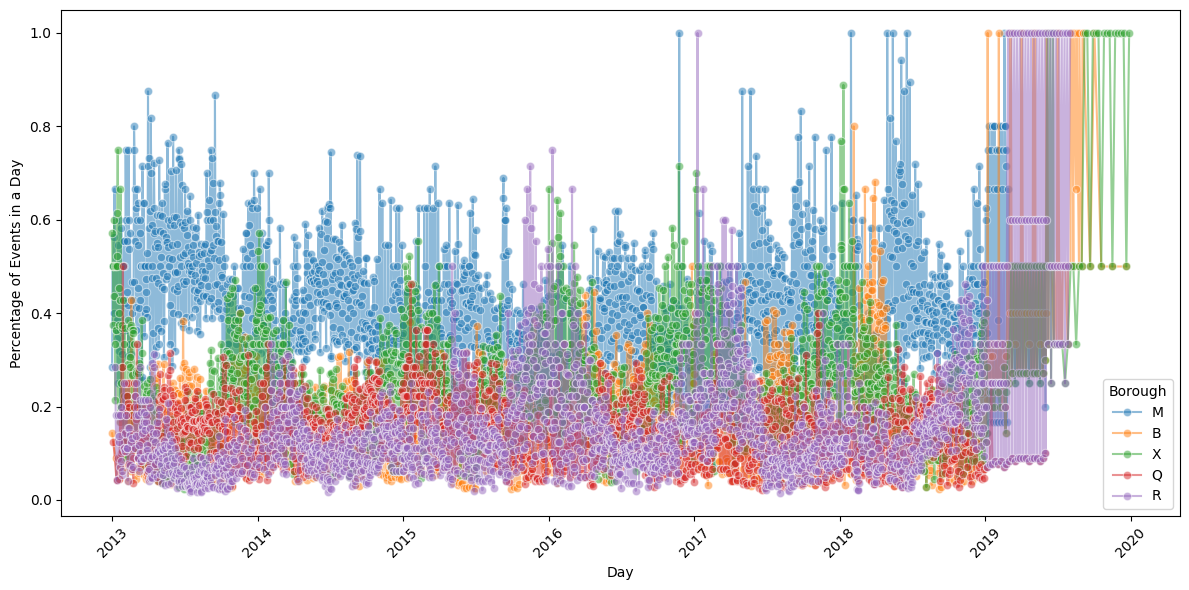

In [71]:
# PLOTTING
events_count['date'] = pd.to_datetime(events_count['date'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=events_count, x='date', y='day_normalized_events', hue='borough', marker='o', alpha=0.5)

#plt.title('Distribution of Events by Day and Borough')
plt.xlabel('Day')
plt.ylabel('Percentage of Events in a Day')
plt.xticks(rotation=45)
plt.legend(title='Borough')
plt.tight_layout()

plt.savefig('plots/events_distribution_by_borough_and_day-normalized-by-day-sum.png')
plt.show()

In [65]:
events_count
# drop one
events_count = events_count.drop(columns=['total_events'])

In [66]:
events_count

,date,borough,events_count,borough_normalized_events,day_normalized_events,total_events_by_borough,total_events_by_day
3958,2016-05-21,M,75,0.002606,0.520833,28782,144
3799,2015-05-16,M,73,0.002536,0.462025,28782,158
7823,2013-09-28,M,70,0.002432,0.679612,28782,103
3825,2014-05-17,M,67,0.002328,0.485507,28782,138
8343,2016-10-15,M,65,0.002258,0.457746,28782,142
...,...,...,...,...,...,...,...
2517,2014-04-02,B,1,0.000087,0.062500,11519,16
2522,2015-04-02,B,1,0.000087,0.100000,11519,10
2524,2015-04-02,Q,1,0.000094,0.100000,10695,10
9177,2017-11-13,R,1,0.000113,0.200000,8812,5


In [67]:
# Save the events count dataframe to a CSV file
events_count.to_csv('data/events/events_count.csv', index=False)

## 4. Attractions

In [92]:
# read file that is in xlsx format
attractions = pd.read_excel("data/attractions/New_York_Tourist_Locations.xlsx")

c:\Users\Uporabnik\.conda\envs\bdproject\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [101]:

# from zip code to borough
# read zipcodes file
zipcodes = pd.read_csv("data/attractions/NYC_zipcodes.csv")

In [102]:
attractions

,Tourist_Spot,Address,Zipcode
0,47th Street - The Diamond District,"47th St. betw. Fifth & Sixth Aves. Manhattan, ...",10036
1,9/11 Memorial & Museum,World Trade Center (museum: 180 Greenwich St.)...,10007
2,Abyssinian Baptist Church,"132 Odell Clark Place New York, NY 10030, Harlem",10030
3,Alice Austen House Museum,"2 Hylan Blvd. Staten Island, NY 10305, Staten ...",10305
4,Alice Tully Hall,"1941 Broadway Manhattan, NY 10023, Upper West ...",10023
...,...,...,...
342,Harlem Park to Park,"mail: 134 W. 118th St., ground fl. Manhattan, ...",10026
343,St. Bartholomew's Church,"325 Park Ave Manhattan, NY, Midtown East",10022
344,Kissena Golf Course,"16415 Booth Memorial Ave Queens, NY 11365, Fre...",11365
345,Riverside Park South,"Henry Hudson Parkway at W. 70th St. Manhattan,...",10023


In [103]:
zipcodes

,Borough,Neighborhood,ZIP Codes
0,Bronx,Central Bronx,10453
1,Bronx,Central Bronx,10457
2,Bronx,Central Bronx,10460
3,Bronx,Bronx Park and Fordham,10458
4,Bronx,Bronx Park and Fordham,10467
...,...,...,...
173,Staten Island,South Shore,10312
174,Staten Island,Stapleton and St. George,10301
175,Staten Island,Stapleton and St. George,10304
176,Staten Island,Stapleton and St. George,10305


In [104]:
zipcodes = zipcodes.rename(columns={'ZIP Codes': 'Zipcode'})
zipcodes.columns

Index(['Borough', 'Neighborhood', 'Zipcode'], dtype='object')

In [106]:
# add borough to attractions based on zipcodes df, but first rename the column
attractions = attractions.merge(zipcodes, on='Zipcode', how='left')
attractions

,Tourist_Spot,Address,Zipcode,Borough,Neighborhood
0,47th Street - The Diamond District,"47th St. betw. Fifth & Sixth Aves. Manhattan, ...",10036,Manhattan,Chelsea and Clinton
1,9/11 Memorial & Museum,World Trade Center (museum: 180 Greenwich St.)...,10007,Manhattan,Lower Manhattan
2,Abyssinian Baptist Church,"132 Odell Clark Place New York, NY 10030, Harlem",10030,Manhattan,Central Harlem
3,Alice Austen House Museum,"2 Hylan Blvd. Staten Island, NY 10305, Staten ...",10305,Staten Island,Stapleton and St. George
4,Alice Tully Hall,"1941 Broadway Manhattan, NY 10023, Upper West ...",10023,Manhattan,Upper West Side
...,...,...,...,...,...
342,Harlem Park to Park,"mail: 134 W. 118th St., ground fl. Manhattan, ...",10026,Manhattan,Central Harlem
343,St. Bartholomew's Church,"325 Park Ave Manhattan, NY, Midtown East",10022,NaN,NaN
344,Kissena Golf Course,"16415 Booth Memorial Ave Queens, NY 11365, Fre...",11365,Queens,Central Queens
345,Riverside Park South,"Henry Hudson Parkway at W. 70th St. Manhattan,...",10023,Manhattan,Upper West Side


In [109]:
# nan values for borough, percentage
print(attractions['Borough'].isna().sum() / len(attractions) * 100)

11.527377521613833


In [110]:
boroughs_dict = {
    'Outside NYC': 'O', 
    'Queens': 'Q', 
    'QUEENS': 'Q', 
    'Brooklyn': 'K', 
    'BROOKLYN': 'K', 
    'Manhattan': 'NY', 
    'MANHATTAN': 'NY', 
    'Bronx': 'BX', 
    'BRONX': 'BX', 
    'Staten Island': 'R'
}

In [111]:
# change the boroughs to abbreviations
attractions['Borough'] = attractions['Borough'].map(boroughs_dict)
attractions

,Tourist_Spot,Address,Zipcode,Borough,Neighborhood
0,47th Street - The Diamond District,"47th St. betw. Fifth & Sixth Aves. Manhattan, ...",10036,NY,Chelsea and Clinton
1,9/11 Memorial & Museum,World Trade Center (museum: 180 Greenwich St.)...,10007,NY,Lower Manhattan
2,Abyssinian Baptist Church,"132 Odell Clark Place New York, NY 10030, Harlem",10030,NY,Central Harlem
3,Alice Austen House Museum,"2 Hylan Blvd. Staten Island, NY 10305, Staten ...",10305,R,Stapleton and St. George
4,Alice Tully Hall,"1941 Broadway Manhattan, NY 10023, Upper West ...",10023,NY,Upper West Side
...,...,...,...,...,...
342,Harlem Park to Park,"mail: 134 W. 118th St., ground fl. Manhattan, ...",10026,NY,Central Harlem
343,St. Bartholomew's Church,"325 Park Ave Manhattan, NY, Midtown East",10022,NaN,NaN
344,Kissena Golf Course,"16415 Booth Memorial Ave Queens, NY 11365, Fre...",11365,Q,Central Queens
345,Riverside Park South,"Henry Hudson Parkway at W. 70th St. Manhattan,...",10023,NY,Upper West Side


In [115]:
# count the number of attractions in each borough and save to a dictionary
borough_attractions_counts = attractions['Borough'].value_counts().to_dict()

# normalize by the total number of attractions, non nan values
total_attractions = len(attractions.dropna(subset=['Borough']))

for borough in borough_attractions_counts:
    borough_attractions_counts[borough] /= total_attractions
   
with open('data/attractions/borough_attractions_counts.json', 'w') as file:
    json.dump(borough_attractions_counts, file)

print(borough_attractions_counts)

{'NY': 0.6319218241042345, 'K': 0.16938110749185667, 'Q': 0.08143322475570032, 'BX': 0.06514657980456026, 'R': 0.05211726384364821}


## 5. Businesses

In [74]:
# improt business data the same way as schools
business = pd.read_csv('data/businesses/Legally_Operating_Businesses_20240719.csv', low_memory=False)

  DCA License Number License Type License Expiration Date License Status  \
0        0967332-DCA     Business              02/28/2017       Inactive   
1        2103411-DCA   Individual              03/31/2024         Active   
2        2060087-DCA   Individual              03/31/2024         Active   
3        2078026-DCA   Individual              03/31/2024         Active   
4        2057801-DCA   Individual              02/28/2019       Inactive   

  License Creation Date                      Industry        Business Name  \
0            02/04/2010   Home Improvement Contractor  BARBARINO, JOHN JR.   
1            01/11/2022             Sightseeing Guide      Nieciak, Joseph   
2            10/31/2017             Sightseeing Guide        Arcaro, Tyler   
3            09/11/2018             Sightseeing Guide       HESSE, DAPHNEE   
4            09/01/2017  Home Improvement Salesperson       ESCOBAR, KEVIN   

                      Business Name 2 Address Building Address Street Name

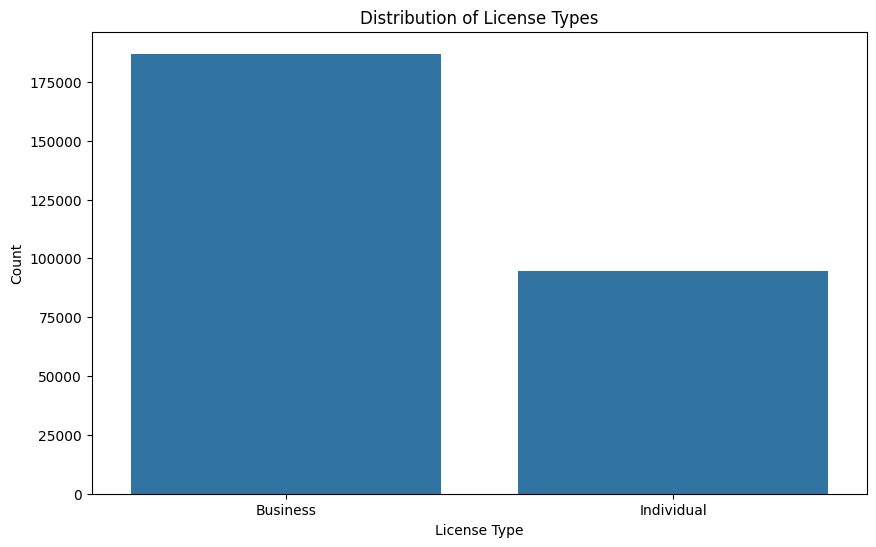

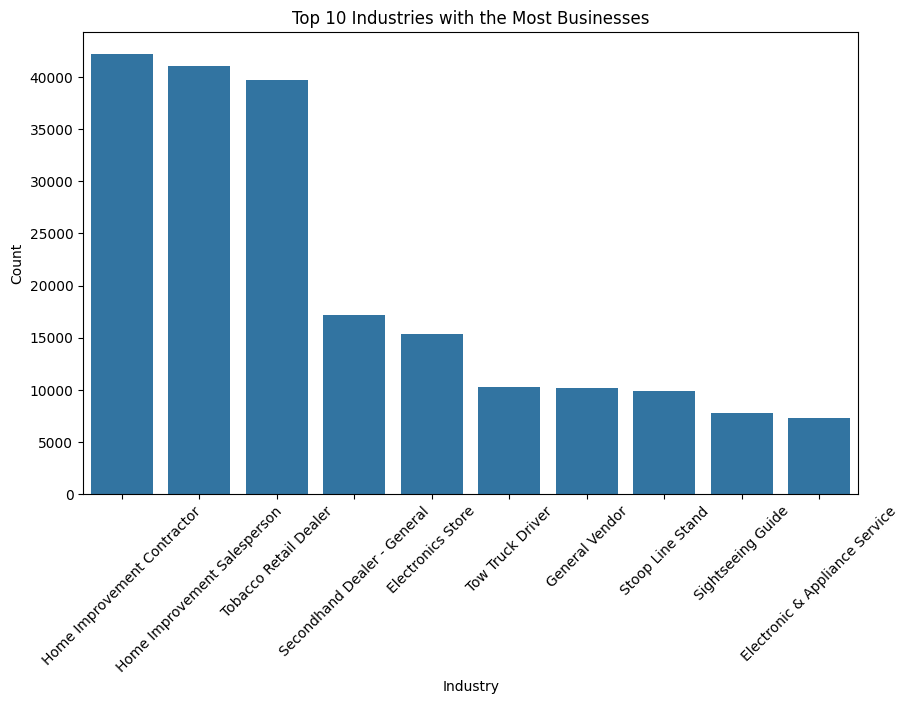

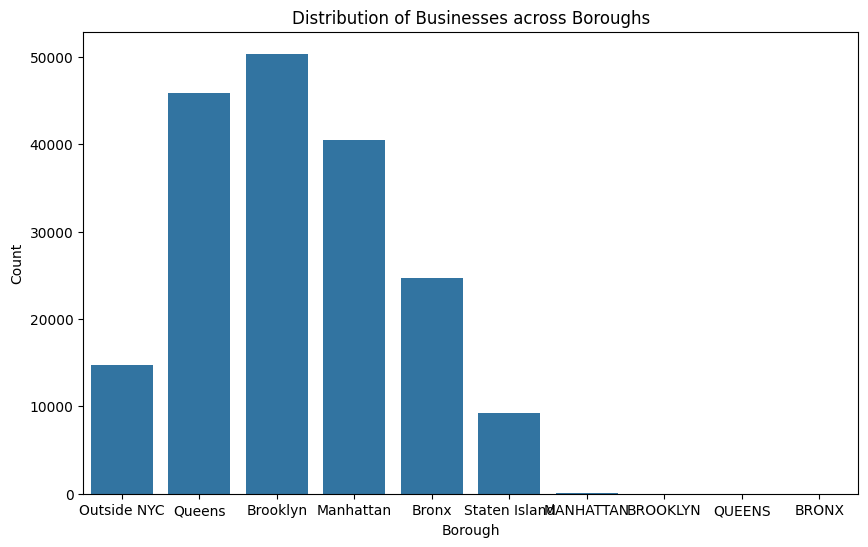

In [75]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

print(business.head())
print(business.describe())
print(business.dtypes)
print(business.isnull().sum())

# distribution of the 'License Type' column
plt.figure(figsize=(10, 6))
sns.countplot(data=business, x='License Type')
plt.title('Distribution of License Types')
plt.xlabel('License Type')
plt.ylabel('Count')
plt.show()

# the top 10 industries with the most businesses
top_industries = business['Industry'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_industries.index, y=top_industries.values)
plt.title('Top 10 Industries with the Most Businesses')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# the distribution of businesses across boroughs
plt.figure(figsize=(10, 6))
sns.countplot(data=business, x='Address Borough')
plt.title('Distribution of Businesses across Boroughs')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.show()


In [78]:
# unique borough values
business['Address Borough'].unique()

array(['Outside NYC', nan, 'Queens', 'Brooklyn', 'Manhattan', 'Bronx',
       'Staten Island', 'MANHATTAN', 'BROOKLYN', 'QUEENS', 'BRONX'],
      dtype=object)

In [79]:
# we have to change the boroughs to letters:
# Dictionary to map borough names to single letters
boroughs_dict = {
    'Outside NYC': 'O', 
    'Queens': 'Q', 
    'QUEENS': 'Q', 
    'Brooklyn': 'K', 
    'BROOKLYN': 'K', 
    'Manhattan': 'NY', 
    'MANHATTAN': 'NY', 
    'Bronx': 'BX', 
    'BRONX': 'BX', 
    'Staten Island': 'R'
}

In [80]:
#replace function using the dict will convert the old boroughs to the new boroughs
business['Address Borough'] = business['Address Borough'].replace(boroughs_dict)

In [81]:
business['Address Borough'].unique()

array(['O', nan, 'Q', 'K', 'NY', 'BX', 'R'], dtype=object)

In [88]:
# count the number of businesses in each borough and save to a dictionary
borough_business_counts = business['Address Borough'].value_counts().to_dict()

# normalize by the total number of businesses
total_businesses = len(business)
for borough in borough_business_counts:
    borough_business_counts[borough] /= total_businesses
   
with open('data/businesses/borough_business_counts.json', 'w') as file:
    json.dump(borough_business_counts, file)

print(borough_business_counts)

{'K': 0.1789576174519301, 'Q': 0.16281053114106314, 'NY': 0.14384907591333734, 'BX': 0.08778556783091045, 'O': 0.05250290498306759, 'R': 0.03292314143269856}
